In [1]:
import torch
from torchvision.io import read_image
from torchvision.transforms import Resize
from segment_anything import SamPredictor, sam_model_registry
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [3]:
sam = sam_model_registry["vit_h"](checkpoint="/root/autodl-tmp/checkpoints/SAM/sam_vit_h_4b8939.pth")
sam.to("cuda")
predictor = SamPredictor(sam)

In [5]:
image = cv2.imread('/root/BBSEA/images/Ayanami-icon.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

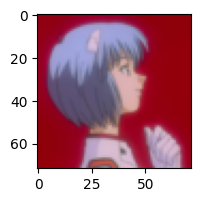

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(image)
# plt.axis('on')
plt.show()

In [7]:
input_point = np.array([[30, 30]])
input_label = np.array([1])

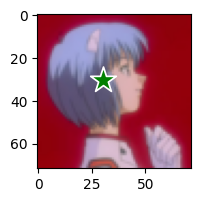

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [9]:
predictor.set_image(image)

In [10]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

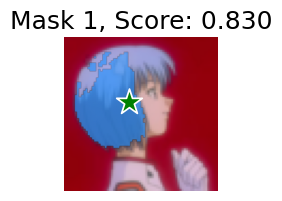

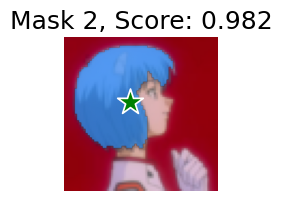

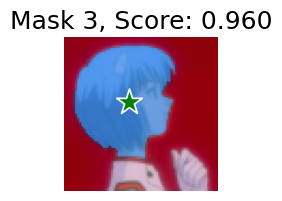

In [12]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

In [13]:
input_boxes = torch.tensor([
    [5, 5, 30, 30],
    [42, 42, 70, 70],
], device=predictor.device)

In [14]:
transformed_boxes = predictor.transform.apply_boxes_torch(input_boxes, image.shape[:2])

In [15]:
masks, _, _ = predictor.predict_torch(
    point_coords=None,
    point_labels=None,
    boxes=transformed_boxes,
    multimask_output=False,
)

In [19]:
masks[0][0]

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')

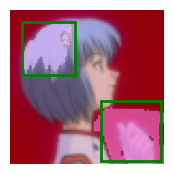

In [16]:
plt.figure(figsize=(2, 2))
plt.imshow(image)
for mask in masks:
    show_mask(mask.cpu().numpy(), plt.gca(), random_color=True)
for box in input_boxes:
    show_box(box.cpu().numpy(), plt.gca())
plt.axis('off')
plt.show()

In [31]:
transformed_boxes[1]

tensor([597.3333, 597.3333, 995.5555, 995.5555], device='cuda:0')

In [170]:
masks, _, _ = predictor.predict(point_coords=np.array([[1,1]]), point_labels=np.array([0]))
masks.shape

(3, 72, 72)

In [171]:
masks=np.transpose(masks,(1,2,0))
print(masks.shape)
print(masks.dtype)

(72, 72, 3)
bool


In [179]:
a=masks[:,:,2]
a.shape

(72, 72)

In [168]:
img=img.astype(np.float32)
print(img.dtype)

float32


In [169]:
img.shape

(72, 72)

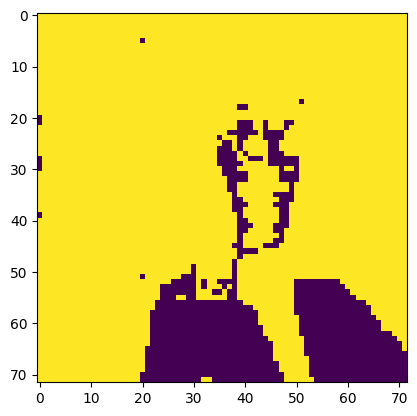

In [180]:
plt.imshow(a)
# plt.axis('off')  # Hide axes for better viewing
# plt.show()

In [62]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/root/autodl-tmp/checkpoints/SAM/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

img=read_image("/root/autodl-tmp/Ayanami.png")
resize_transform=Resize((1024, 1024))
img=resize_transform(img)[:3]

In [63]:
img = img.permute(1, 2, 0)
img.shape
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()

torch.Size([1024, 1024, 3])

In [66]:
img = img.permute(2, 0, 1)
img.shape

torch.Size([3, 1024, 1024])

In [67]:
masks = mask_generator.generate(img)

In [68]:
masks

[]